<a href="https://colab.research.google.com/github/lewisha/Using-Hueristic-Algorithm-Solves-the-TSP/blob/main/generic_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ERROR: Could not find a version that satisfies the requirement GA_TSP (from versions: none)
ERROR: No matching distribution found for GA_TSP


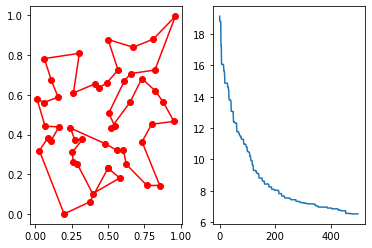

In [26]:
import numpy as np
import pandas as pd
from scipy import spatial
import matplotlib.pyplot as plt

!pip install scikit-opt 
!pip install GA_TSP
from sko.GA import GA, GA_TSP

num_points = 50

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])





ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()

# %% plot
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()
